In [1]:
import torchdeepretina as tdr
import torch
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator

In [2]:
pd.set_option('display.max_columns', 100)
pd.set_option("display.max_rows", 500)

In [3]:
# plt.style.use('../deep-retina-figures/deepretina.mplstyle')

In [4]:
def get_chan(x):
    chan_str = x.chans
    splt = chan_str[1:-1].split(", ")
    return int(splt[0].strip())

### 2d Bnorm

In [5]:
bn2d_df = pd.read_csv("../../training_scripts/convgc/model_data.csv", sep="!")
bn2d_df = bn2d_df.loc[bn2d_df['exp_num']<=47]
bn2d_df['chan'] = bn2d_df.apply(get_chan, axis=1)
bn2d_df.groupby('chan')['save_folder'].count() # Prove there are 3 models in each category

chan
1     3
2     3
3     3
4     3
5     3
6     3
7     3
8     3
9     3
10    3
12    3
15    3
20    3
25    3
30    3
35    3
Name: save_folder, dtype: int64

### 1d Bnorm

In [6]:
bn1d_df = pd.read_csv("../../training_scripts/convgc_1dbn/model_data.csv", sep="!")
bn1d_df = bn1d_df.sort_values(by="test_acc",ascending=False).loc[bn1d_df['dataset']=="15-11-21b"]
bn1d_df['chan'] = bn1d_df.apply(get_chan, axis=1)
bn1d_df.groupby('chan')['save_folder'].count() # Prove there are 3 models in each category

chan
2      3
4      3
6      3
8     11
10     3
12     3
20     3
30     3
Name: save_folder, dtype: int64

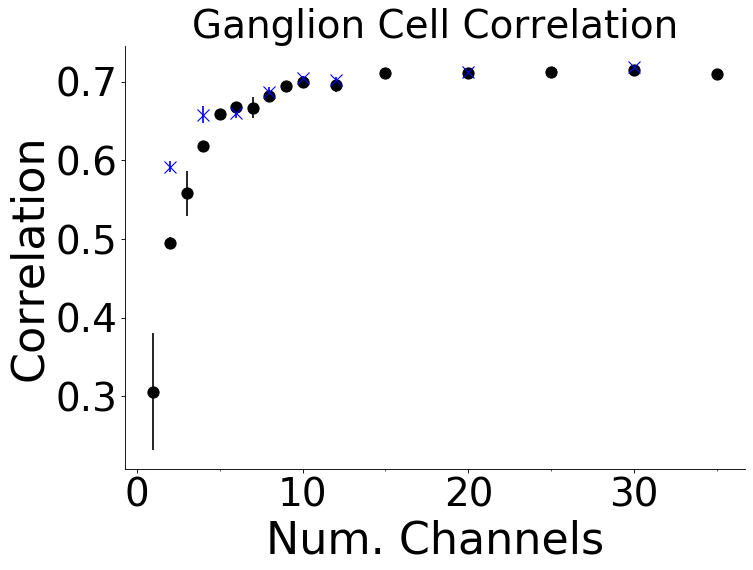

In [11]:
group = 'chan'
col = 'test_acc'
cor_name = "Ganglion Cell"

temp = bn2d_df.groupby(group)[col].mean()
chans_2d = list(temp.keys())
means_2d = [temp[k] for k in chans_2d]
temp = bn2d_df.groupby(group)[col].sem()
errs_2d = [temp[k] for k in chans_2d]

temp = bn1d_df.groupby(group)[col].mean()
chans_1d = list(temp.keys())
means_1d = [temp[k] for k in chans_1d]
temp = bn1d_df.groupby(group)[col].sem()
errs_1d = [temp[k] for k in chans_1d]

fig = plt.figure(figsize=(10,7),dpi=80)
markersize = 10
plt.errorbar(chans_2d, means_2d, yerr=errs_2d, fmt='o', color='black',label="2d BN",markersize=markersize)
plt.errorbar(chans_1d, means_1d, yerr=errs_1d, fmt='x', color='blue',label="1d BN",markersize=markersize)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_minor_locator(MultipleLocator(5))
plt.ylabel("Correlation", fontsize=40)
plt.xlabel("Num. Channels", fontsize=40)
plt.yticks([.3,.4,.5,.6,.7])
#     plt.xticks([10,20,30,40])
ax.tick_params(axis='both', which='major', labelsize=35)
plt.title("{} Correlation".format(cor_name),fontsize=35)
# plt.legend(fontsize=25,loc="lower right")
plt.show()

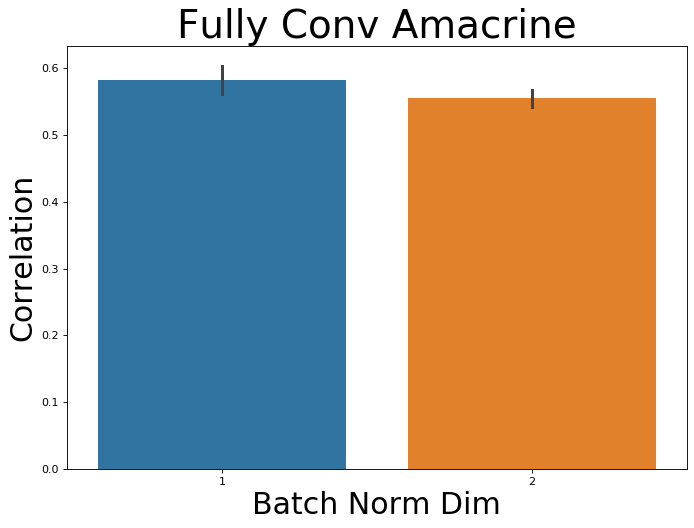

In [12]:
group = 'chan'
col = 'amacrine_intr_cor'
cor_name = "Amacrine"

avail_chans = set(bn1d_df['chan'])
temp = bn2d_df.loc[bn2d_df['chan'].isin(avail_chans)]
temp = bn1d_df.append(temp,sort=True)

fig = plt.figure(figsize=(10,7),dpi=80)
sns.barplot(x="bnorm_d",y=col, data=temp)
plt.title("Fully Conv {}".format(cor_name),fontsize=35)
plt.xlabel("Batch Norm Dim",fontsize=27)
plt.ylabel("Correlation",fontsize=27)
plt.show()

### Chan1

In [18]:
set(bn1d_df["chans"])

{'[10, 10]',
 '[12, 12]',
 '[2, 2]',
 '[20, 20]',
 '[30, 30]',
 '[4, 4]',
 '[6, 6]',
 '[8, 8]'}

In [19]:
df = bn2d_df.copy()
df["chan1"] = df.apply(lambda x: int(x.chans.split(",")[0][1:]), axis=1)
df["chan2"] = df.apply(lambda x: int(x.chans.split(",")[1][:-1]), axis=1)

ValueError: num must be 1 <= num <= 12, not 13

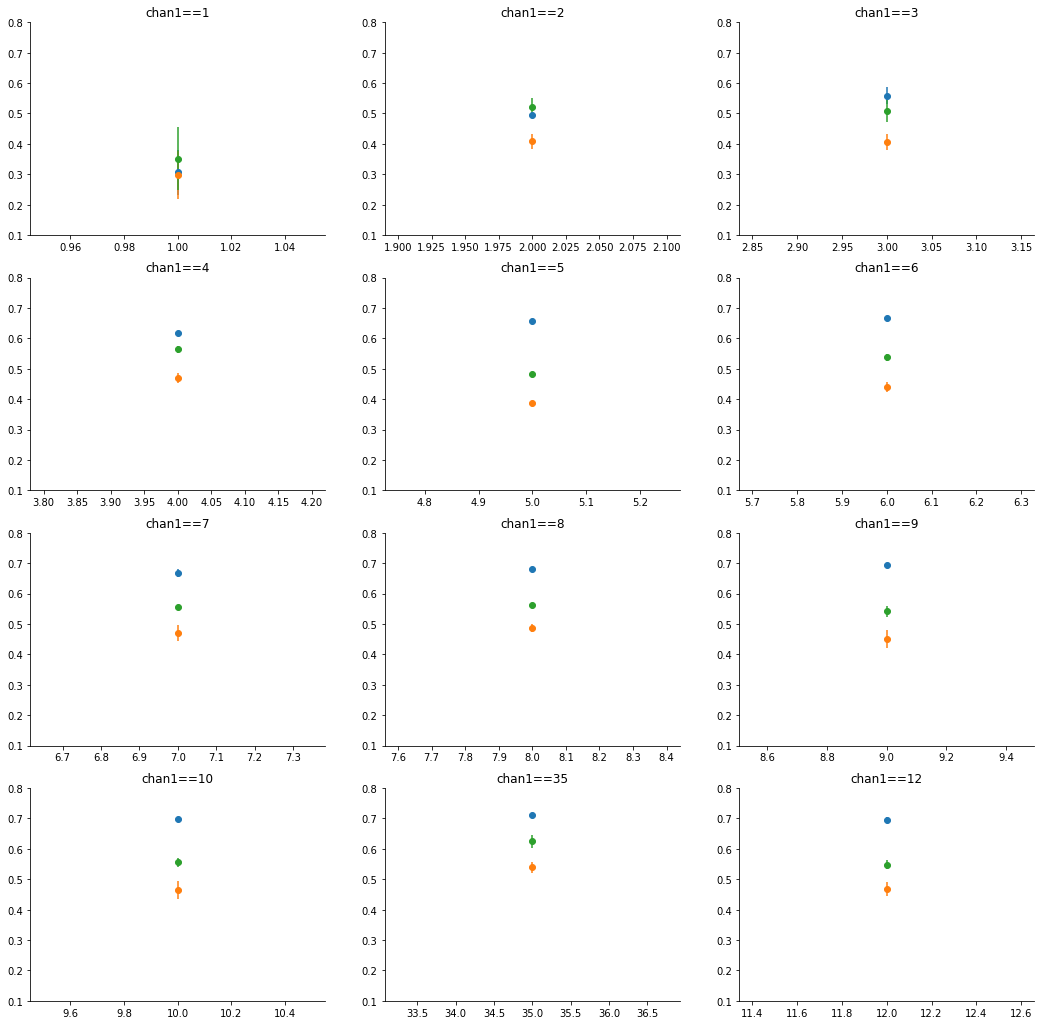

In [20]:
group1 = 'chan1'
group2 = 'chan2'
cols = ['test_acc', "bipolar_intr_cor", "amacrine_intr_cor"]

n_rows = 4
n_cols = 3
idx = 0
fig = plt.figure(figsize=(18,18))
for chan in set(df[group1]):
    idx+=1
    plt.subplot(n_rows, n_cols, idx)
    for col in cols:
        temp = df.loc[df[group1]==chan, :].groupby(group2)[col].mean()
        chans = list(temp.keys())
        means = [temp[k] for k in chans]
        temp = df.loc[df[group1]==chan, :].groupby(group2)[col].sem()
        errs = [temp[k] for k in chans]
        plt.errorbar(chans, means, yerr=errs, fmt='o')
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
#         ax.xaxis.set_minor_locator(MultipleLocator(5))
#         plt.ylabel("Correlation", fontsize=40)
#         plt.xlabel("Num. Channels", fontsize=40)
    plt.yticks([.1,.2,.3,.4,.5,.6,.7, .8])
#         ax.tick_params(axis='both', which='major', labelsize=35)
    plt.title("{}=={}".format(group1, chan))
#         plt.show()
plt.legend(['GC', "Bip", "Amc"])
plt.show()

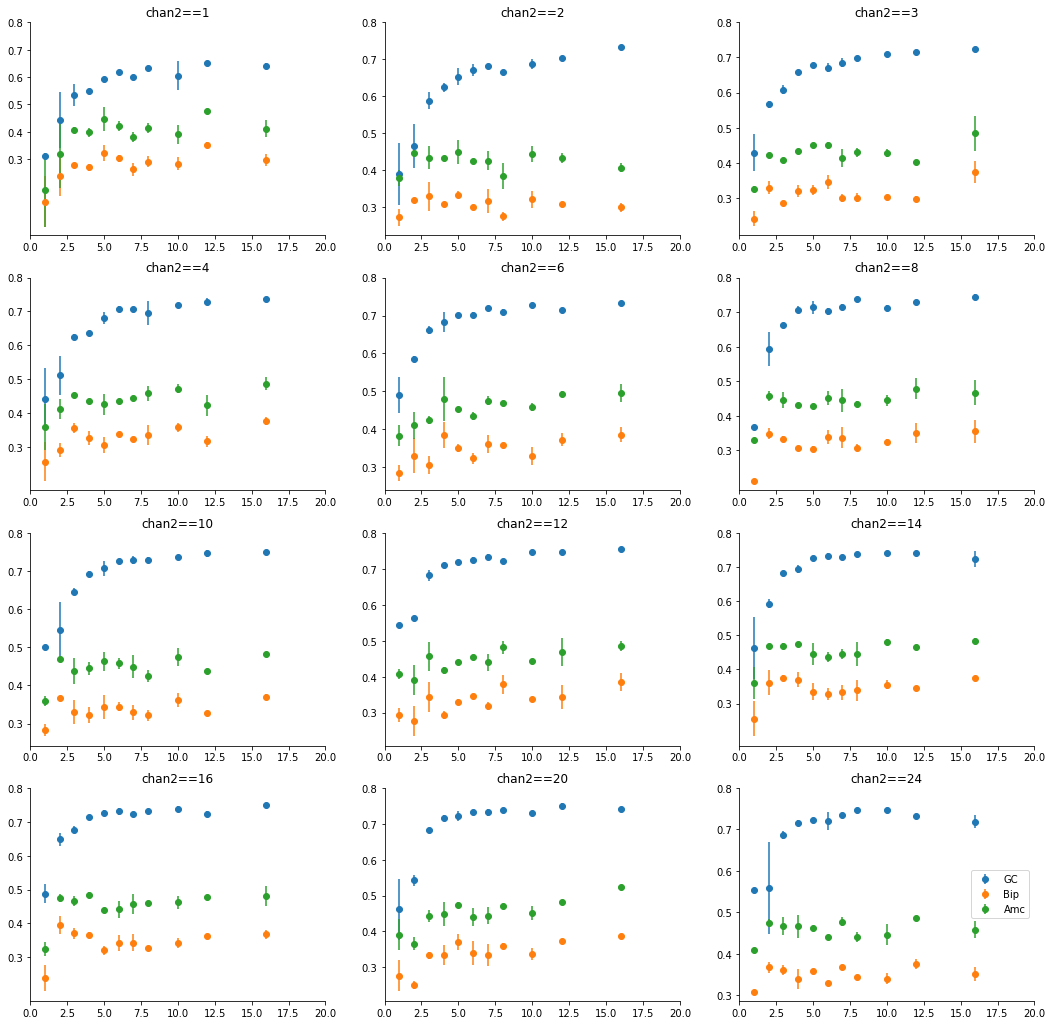

In [7]:
groups = ['chan1', 'chan2']
cols = ['test_acc', "bipolar_intr_cor", "amacrine_intr_cor"]

n_rows = 4
n_cols = 3
idx = 0
fig = plt.figure(figsize=(18,18))
group = groups[1]
for chan in set(df[group]):
    idx+=1
    plt.subplot(n_rows, n_cols, idx)
    for col in cols:
        temp = df.loc[df[group]==chan, :].groupby(groups[0])[col].mean()
        chans = list(temp.keys())
        means = [temp[k] for k in chans]
        temp = df.loc[df[group]==chan, :].groupby(groups[0])[col].sem()
        errs = [temp[k] for k in chans]
        plt.errorbar(chans, means, yerr=errs, fmt='o')
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
#         ax.xaxis.set_minor_locator(MultipleLocator(5))
#         plt.ylabel("Correlation", fontsize=40)
#         plt.xlabel("Num. Channels", fontsize=40)
    plt.yticks([.3,.4,.5,.6,.7, .8])
    plt.xlim([0,20])
#         ax.tick_params(axis='both', which='major', labelsize=35)
    plt.title("{}=={}".format(group, chan))
#         plt.show()
plt.legend(['GC', "Bip", "Amc"])
plt.show()

Text(0.5, 0, '2nd Layer Channel Count')

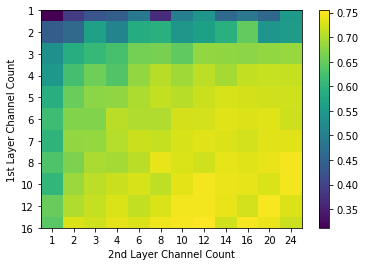

In [8]:
img = np.zeros((len(set(df['chan1'])), len(set(df['chan2']))))
for row,c1 in enumerate(set(df['chan1'])):
    for col,c2 in enumerate(set(df['chan2'])):
        img[row,col] = df.loc[(df['chan1']==c1)&(df['chan2']==c2), 'test_acc'].mean()
plt.imshow(img)
plt.colorbar()
plt.yticks(range(img.shape[0]),list(set(df['chan1'])))
plt.ylabel("1st Layer Channel Count")
plt.xticks(range(img.shape[1]),list(set(df['chan2'])))
plt.xlabel("2nd Layer Channel Count")

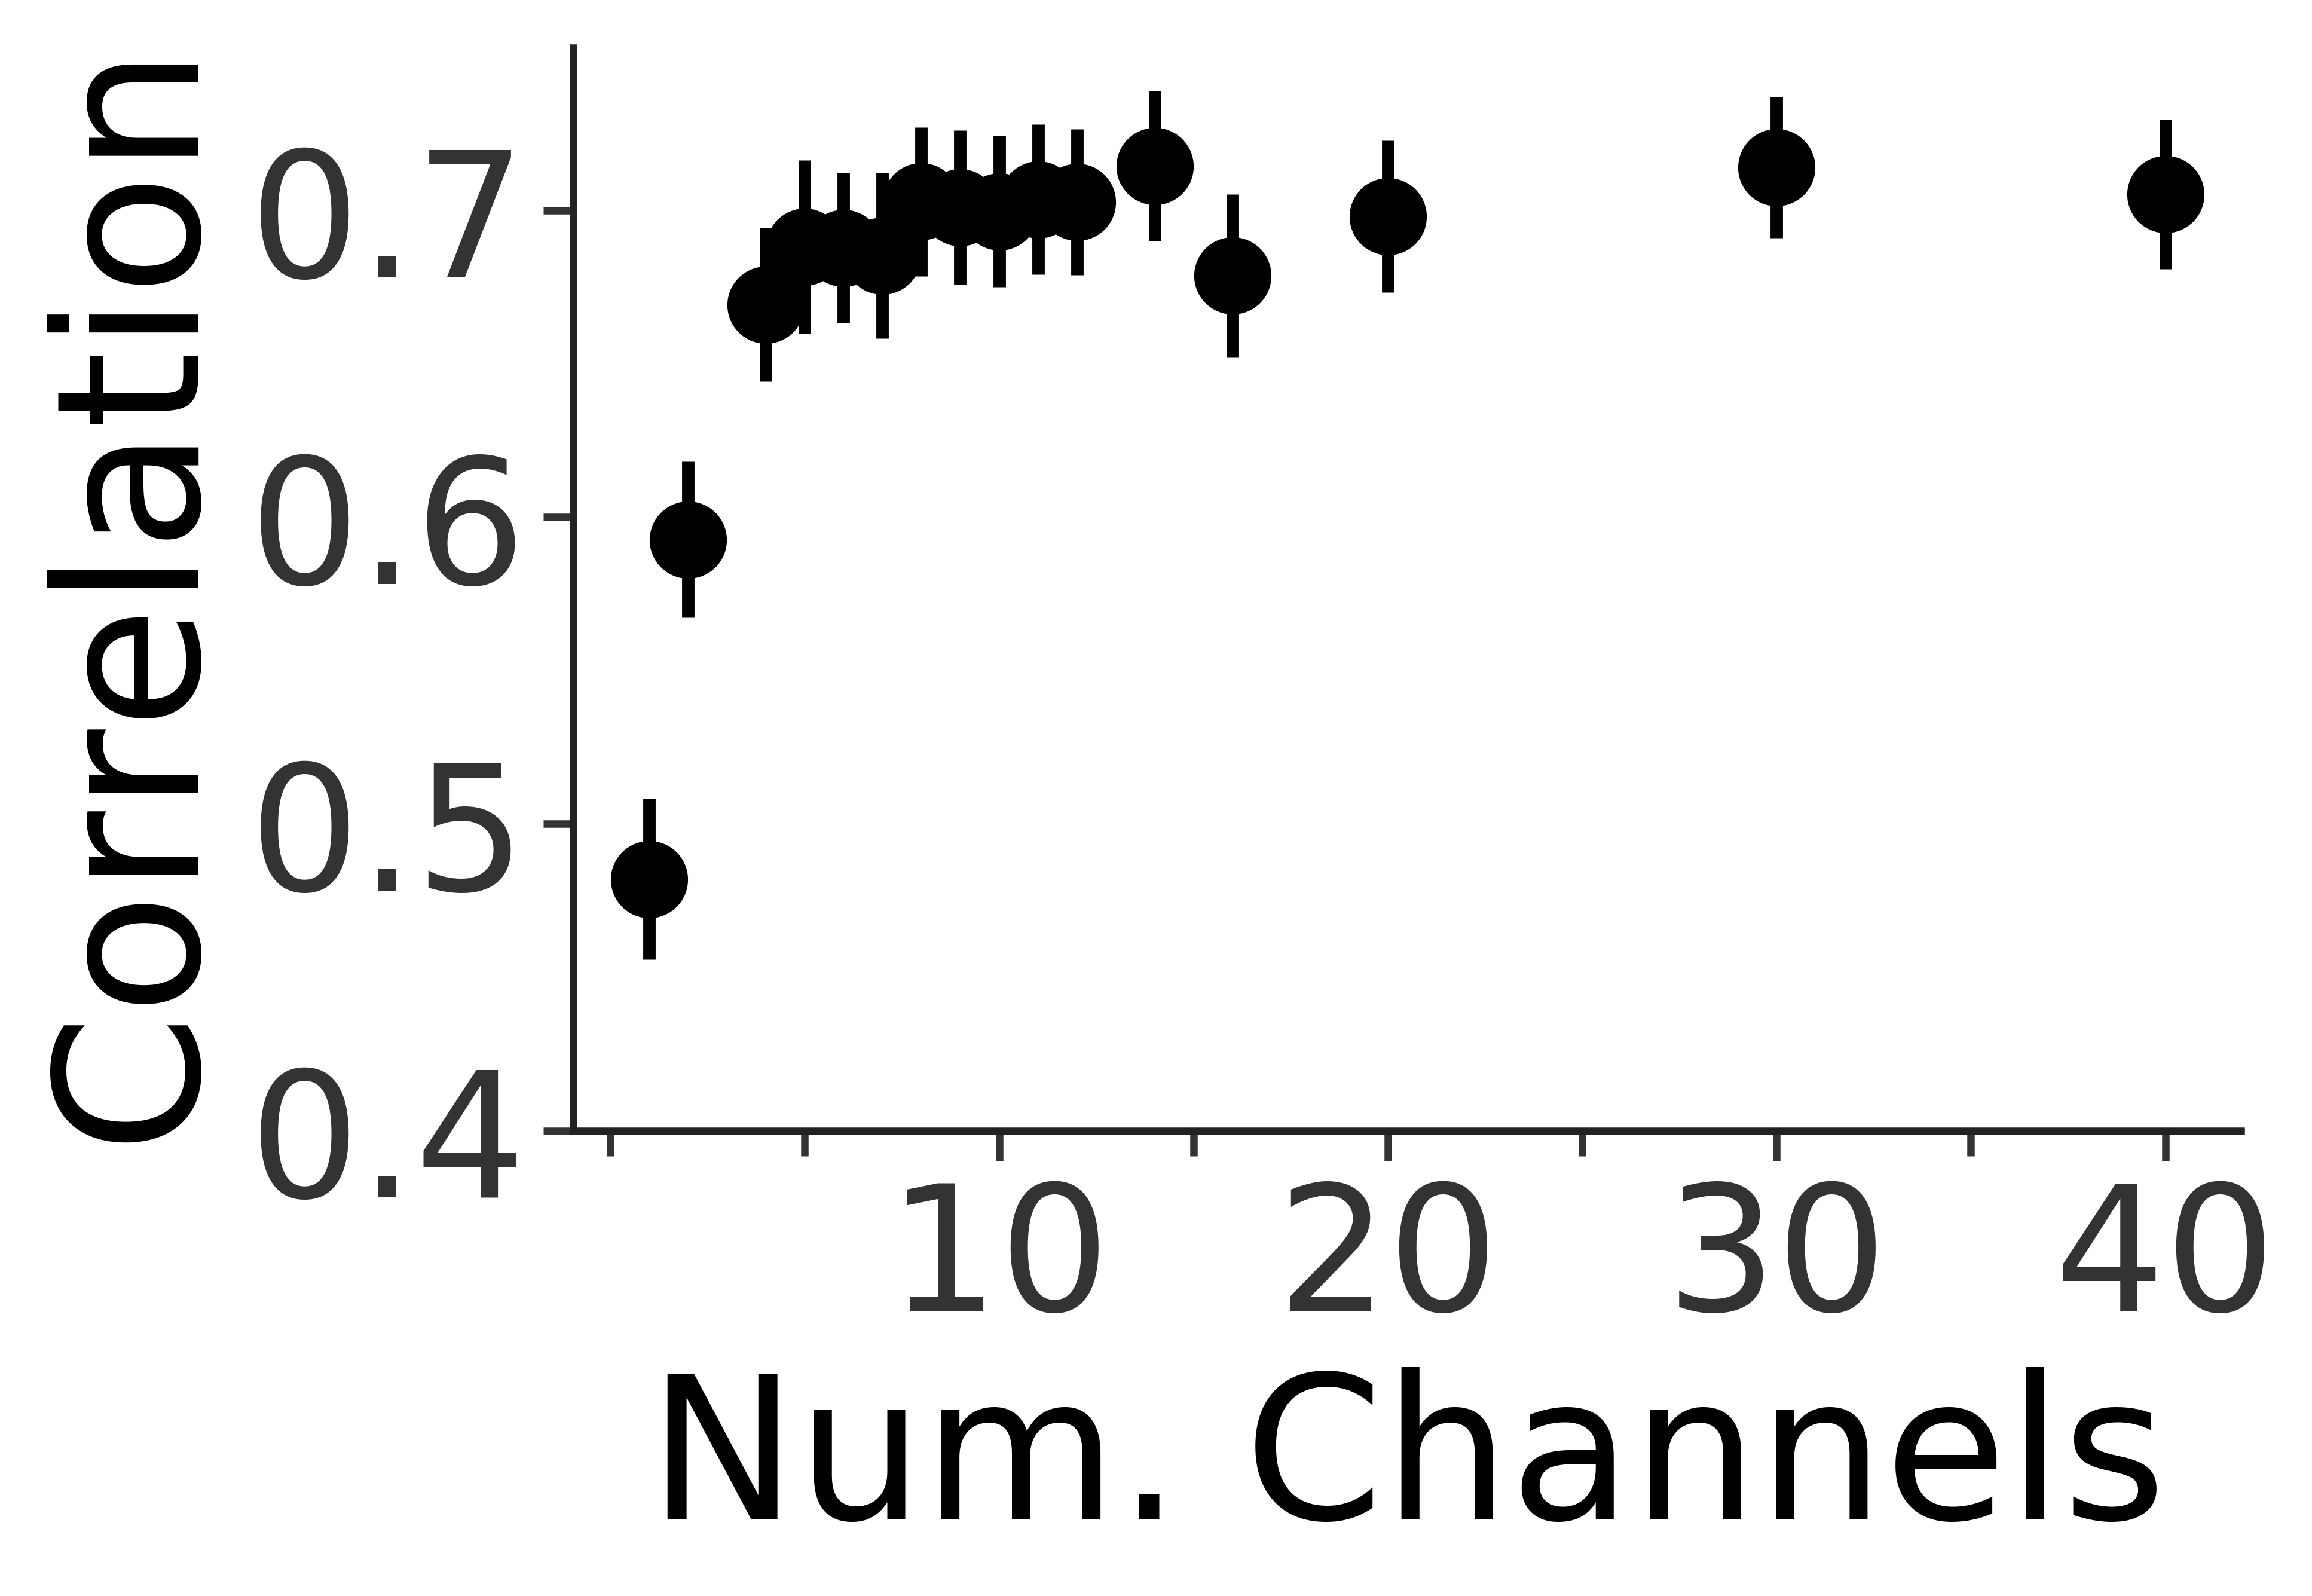

In [8]:
# plt.plot(contrasts, [np.mean(gain_slopes_no_nones['naturalscene'][contrast]) for contrast in contrasts], 'o')
temp = frame.groupby('chan_num')['cor'].mean()
chans = list(temp.keys())
means = [temp[k] for k in chans]
temp = frame.groupby('chan_num')['cor'].sem()
errs = [temp[k] for k in chans]
plt.errorbar(chans, means, yerr=errs, fmt='o', color='black')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_minor_locator(MultipleLocator(5))
plt.ylabel("Correlation", fontsize=40)
plt.xlabel("Num. Channels", fontsize=40)
plt.yticks([.4,.5,.6,.7])
plt.xticks([10,20,30,40])
ax.tick_params(axis='both', which='major', labelsize=35)
# plt.savefig("channel_saturation.pdf")
# plt.savefig("channel_saturation.png")


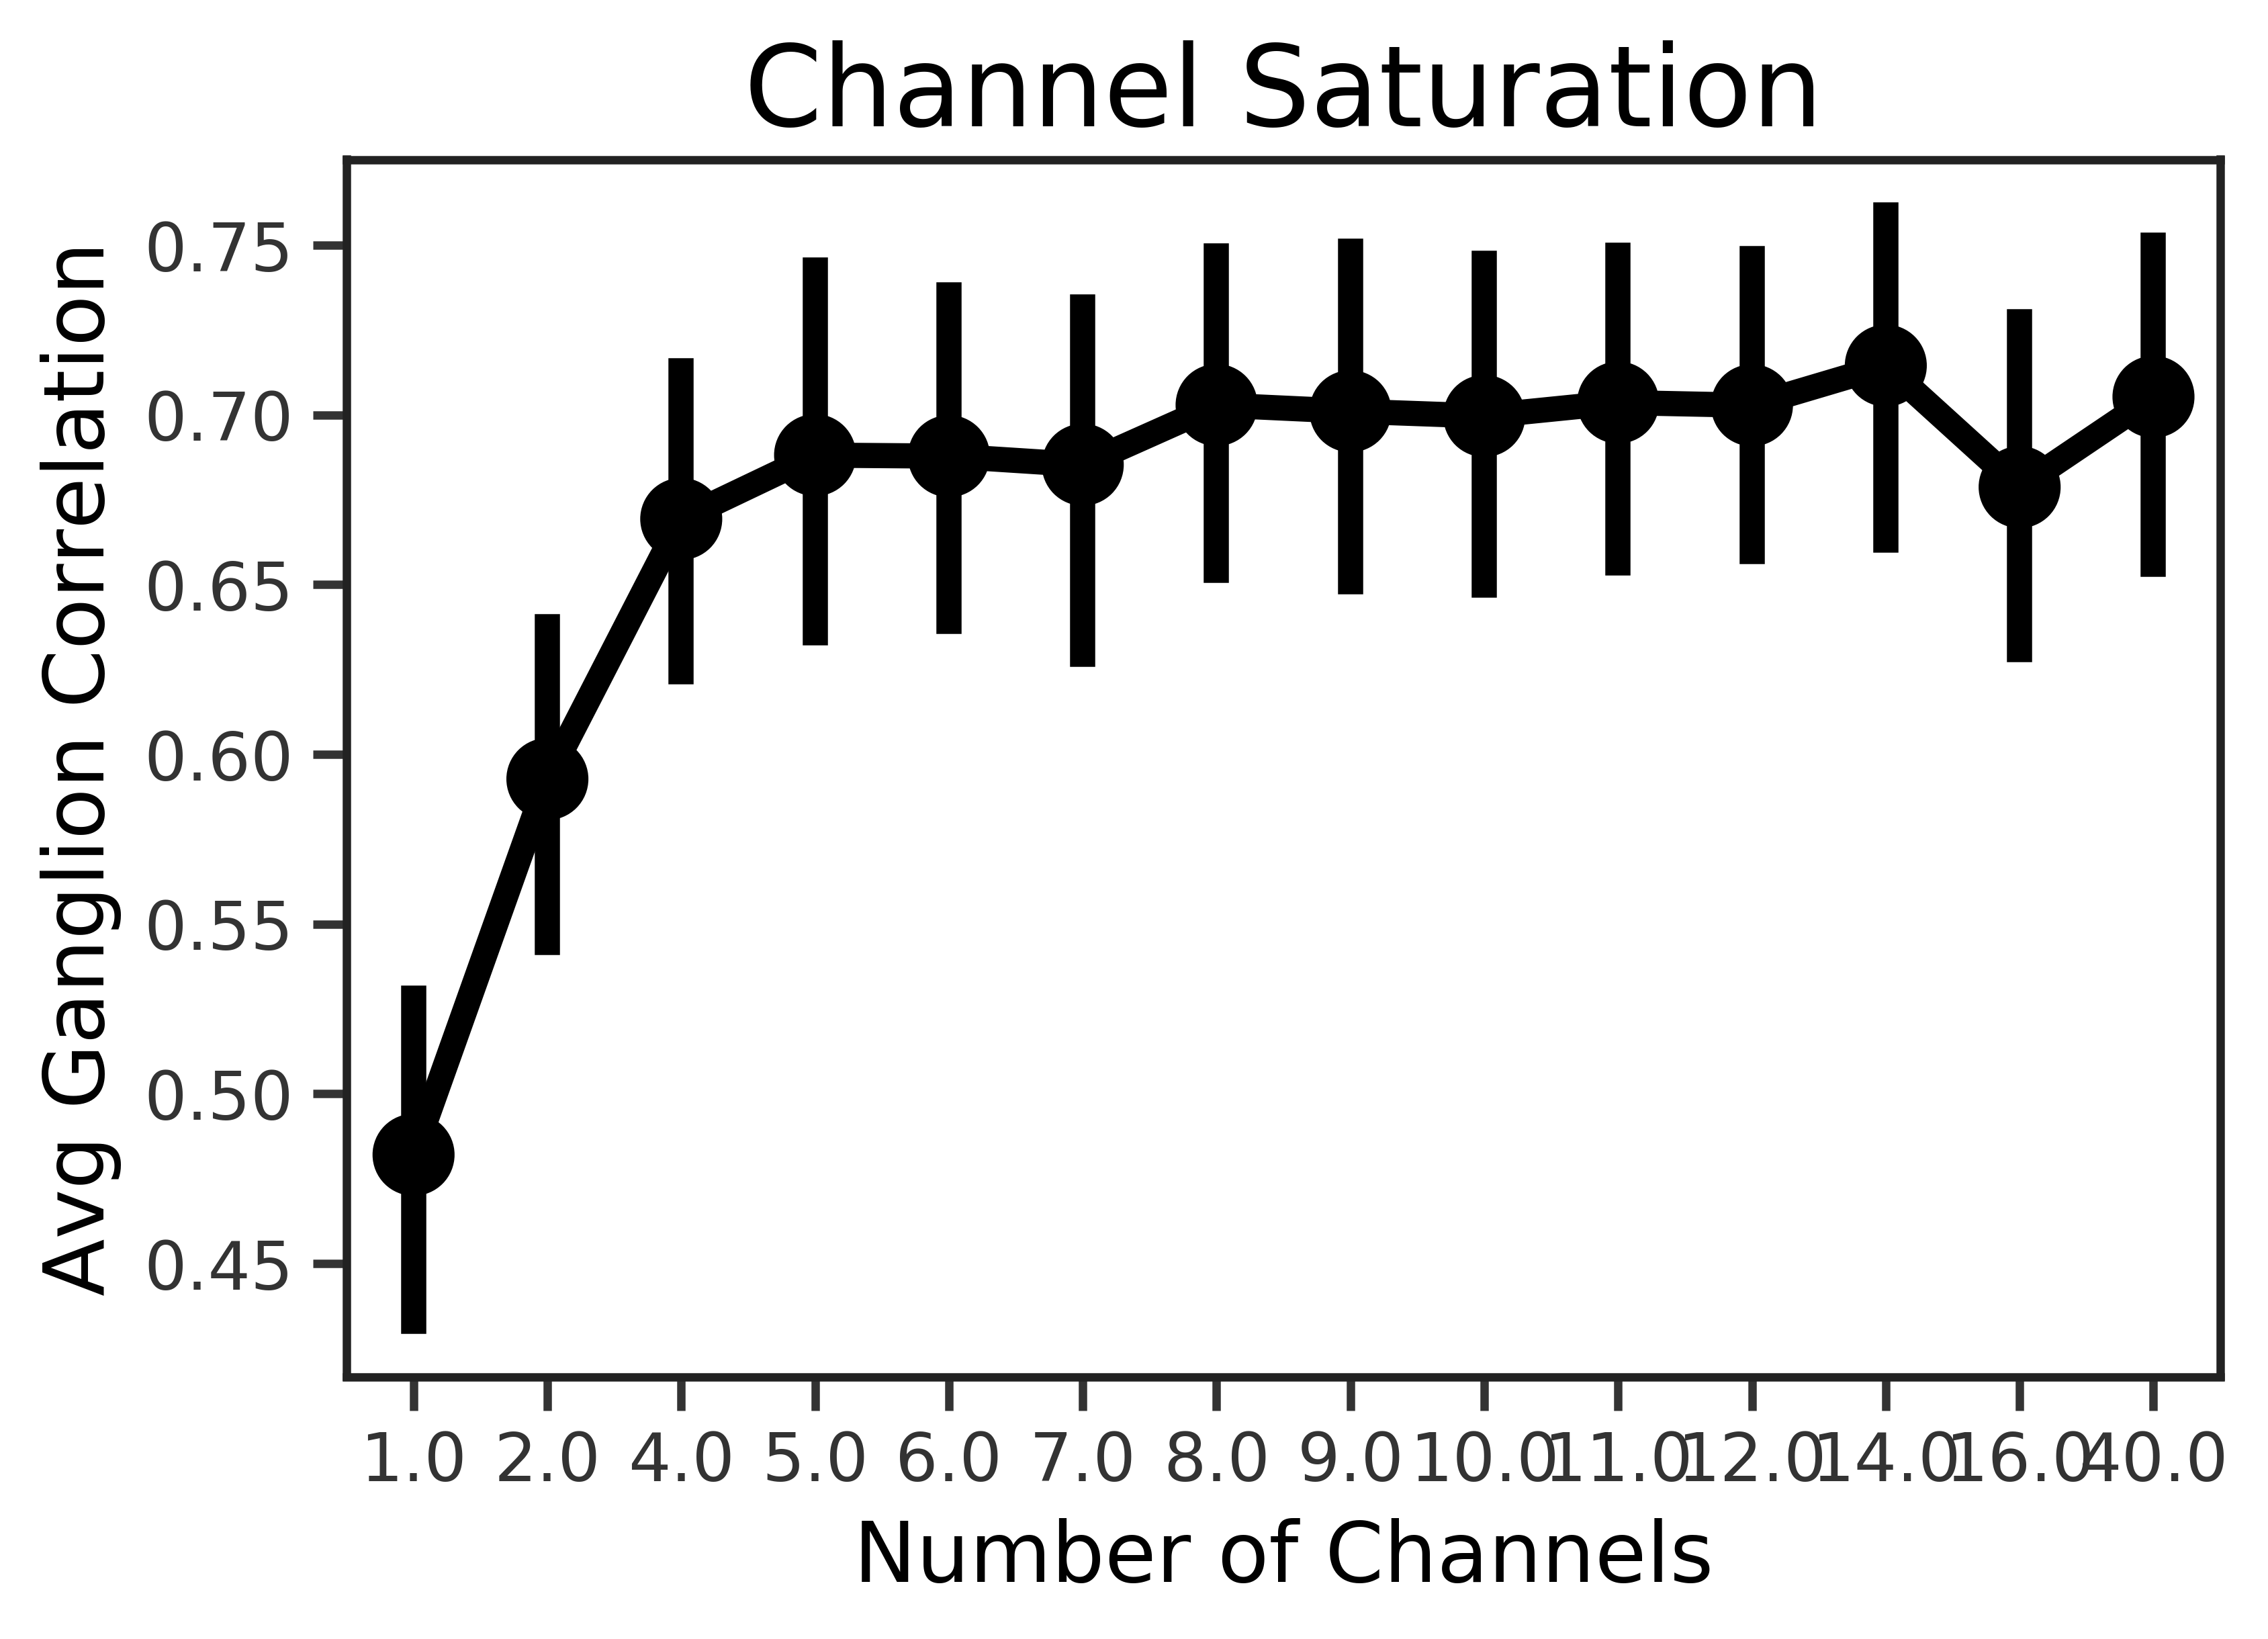

In [8]:
ax = sns.pointplot(x="chan_num", y="cor", data=frame, color='black')
# ax = sns.lineplot(x="chan_num", y="test_acc", data=frame, ax=ax)
ax.set_xlabel("Number of Channels", fontsize=15)
ax.set_ylabel("Avg Ganglion Correlation", fontsize=15)
plt.title("Channel Saturation", fontsize=20)
plt.savefig("channel_saturation.eps")

plt.show()

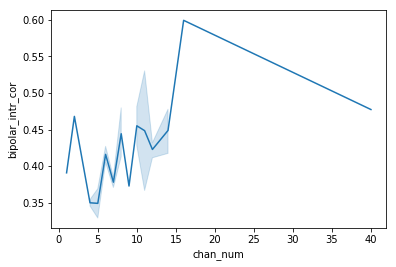

In [12]:
sns.lineplot(x="chan_num", y="bipolar_intr_cor", data=frame)

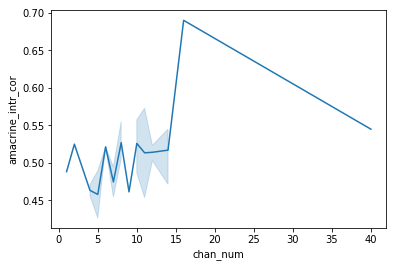

In [13]:
sns.lineplot(x="chan_num", y="amacrine_intr_cor", data=frame)

In [ ]:
prepath = "../training_scripts/"
layers = ['sequential.0','sequential.6']
for chan in set(frame['chans']):
    entry = frame.loc[frame['chans']==chan,:].sort_values(by="test_acc").iloc[0]
    folder = entry['save_folder']
    exp_num = entry['exp_num']
    model_name = "linearstacked_"+str(exp_num)
    model = tdr.analysis.read_model(prepath+folder)
    model.eval()
    model.cuda()
    sta_dict = tdr.analysis.get_sta(model, layers=layers)
    
    for layer in layers
        decomps = []
        stas = sta_dict[layer]
        for sta in stas:
            spat, temp = ft.decompose(sta)
            spatials.append(spat)
            temporals.append(temp)
            
        fig = plt.figure(figsize=(15,10),constrained_layout=True)
        plt.suptitle("{} Receptive Fields".format(layer))
        size = (13,4)
        span = int(size[0]//2)
        #hspace=0.05,wspace=0.5,,left=0.02, right=0.95
        gridspec.GridSpec(*size)
#         spat_mult = [1, 1, -1, 1, -1, 1, -1, 1]
#         temp_mult = [1, 1, 1, 1, 1, -1, 1, 1]
        spat_mult = np.ones(len(spatials))
        temp_mult = np.ones(len(temporals))
        subt = 2
        n_plots = int((len(spatials)//4)*4)
        for i in range(len(spatials)):
            spatial, temporal = spatials[i]*spat_mult[i], temporals[i]*temp_mult[i]
            absmax = np.abs(spatial).max()
            spatial = spatial[14:37,14:37]

            loc = (1+(i%2)*span+(span-subt),i//2)
            ax = plt.subplot2grid(size,loc, rowspan=subt)    
            plt.rcParams.update({'font.size': 22})
            ax.set_yticklabels([])
            ax.set_xticklabels([])
            ax.set_yticks([])
            ax.set_xticks([])
            ax.set_ylim([-.5,.5])
        #     ax.set_aspect(aspect=20)
            plt.box(on=None)
            plt.plot(temporal[2:], "k", linewidth=7)
            plt.plot(np.zeros(len(temporal[2:])),'k--')
            if i == 1:
                ax = plt.gca()
                ax.set_xlabel("Time")

            ax = plt.subplot2grid(size,(1+(i%2)*span,i//2),rowspan=int(span-subt))
        #     plt.rcParams.update({'font.size': 10})
            ax.set_yticklabels([])
            ax.set_xticklabels([])
            ax.set_yticks([])
            ax.set_xticks([])
            im = plt.imshow(spatial, cmap = 'seismic', vmin=-absmax, vmax=absmax, aspect="auto")
            if i==0:
                ax.set_ylabel("Space")
            #plt.colorbar(im,fraction=0.046, pad=0.04)
        # fig.tight_layout()
        plt.savefig("drone_fig2A.png")
        plt.show()